In [4]:
%pip install pandas

     ---------------------------------------- 11.1/11.1 MB 5.8 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
from pandas import pandas as pd
%matplotlib inline

def drawVenn2(A,B,labels = ('A', 'B')):
    '''
    listing elements in Venn diagram of two sets
    '''
    v2=venn2([A,B],set_labels = labels);
    v2.get_label_by_id('01').set_text(', '.join(map(str,B-A)))
    v2.get_label_by_id('10').set_text(', '.join(map(str,A-B)))
    if A&B:
        v2.get_label_by_id('11').set_text(', '.join(map(str,A&B)))

def drawVenn3(A,B,C,labels = ('A', 'B', 'C')):
    '''
    listing elements in Venn diagram of three sets, A, B, C
    '''
    v3=venn3([A,B,C],set_labels = labels);
    if A-B-C:
        v3.get_label_by_id('100').set_text('\n'.join(map(str,A-B-C)))
        v3.get_patch_by_id('100').set_alpha(0.6)
        v3.get_patch_by_id('100').set_facecolor('Yellow')
    if A&B-C:
        v3.get_label_by_id('110').set_text('\n'.join(map(str,A&B-C)))
        v3.get_patch_by_id('110').set_alpha(0.3)
        v3.get_patch_by_id('110').set_facecolor('Red')
    if B-C-A:
        v3.get_label_by_id('010').set_text('\n'.join(map(str,B-C-A)))
        v3.get_patch_by_id('010').set_alpha(0.6)
        v3.get_patch_by_id('010').set_facecolor('Magenta')
    if A&C-B:
        v3.get_label_by_id('101').set_text('\n'.join(map(str,A&C-B)))
        v3.get_patch_by_id('101').set_alpha(0.3)
        v3.get_patch_by_id('101').set_facecolor('Green')
    if A&B&C:
        v3.get_label_by_id('111').set_text('\n'.join(map(str,A&B&C)))
        v3.get_patch_by_id('111').set_alpha(0.1)
        v3.get_patch_by_id('111').set_facecolor('Black')
    if B&C-A:
        v3.get_label_by_id('011').set_text('\n'.join(map(str,B&C-A)))
        v3.get_patch_by_id('011').set_alpha(0.3)
        v3.get_patch_by_id('011').set_facecolor('Blue')
    if C-B-A:
        v3.get_label_by_id('001').set_text('\n'.join(map(str,C-B-A)))
        v3.get_patch_by_id('001').set_alpha(0.6)
        v3.get_patch_by_id('001').set_facecolor('Cyan')

### Proving Identities

1. $A \cap B^c$: The intersection $\cap$ represents everything in common between A and $B^c$, but the complement (c) symbol means that the second set is "everything in U except elements in set B". This means that the equation represents things that are both in A *and* not in B, which is identical to $A-B$.

2. $B = (B \cap A) \cup (B \cap A^{c})$: The interesection of B and A means everything in common with sets B and A. This is combined with the intersection of B and $A^c$, which is the intersection of B and everything not in A. To demonstrate:

* $A = {1, 3, 4, 5, 8, 10, 11}$
* $B = {3, 5, 7, 10, 12, 13}$
* $B \cap A = {3, 5, 10}$ - Everything that's in both B *and* A
* $B \cap A^c = {7, 12, 13}$ - Everything that's both in B and *not* in A
* $(B \cap A) + (B \cap A^c) = {3, 5, 7, 10, 12, 13} = B$

3. Identical to 1: $B \cap A^c$ is "everything both in B and not in A", which is identical to $A-B$.

4. $A \cup B$ is all elements that are either in A or B. $A \cup (B \cap A^{c})$ means everything in B but not in A. Combining "everything in A" with "everything in B but not in A" gives us both sets A and B, which is identical to $A \cup B$.

5. $(\textbf{U}_{i=1}^{\infty} A_{i}^{c})^c$ and $\cap_{i=1}^{\infty}A_{i}$ are identical due to De Morgan's Law, which states that the complement of a union is equal to the intersection of the complements.

6. This deals with cardinality; |A| represents the number of elements in A, |B| represents the number of elements in B, etc. The common elements they share is represented with $A \cap B$, which can be represented in a Venn diagram as the "in between" part of the diagram. $|A| + |B| - |A \cap B|$ is basically drawing a Venn diagram with circles A and B and removing the bit in the middle. Adding all of A and all of B together results in doubled numbers in the intersection, so subtracting the intersection removes duplicates and brings it back to a normal union of $A \cup B$.



### Sets and Subsets

1. $A \nsubseteq B$, because $3 \land 5 \notin $ B$ because 3 & 5 are odd numbers, not even. Thus, there are elements in set A that are not a part of B, making A not a subset of B.

2. A = {0,1,2,3,4,5,6,7,8,9}. B = {2,4,6,8}, C = {1,3,5,7,9}, and D = {3,4,5}. The following conditions are known:

* X cannot contain even numbers.
* X should only contain elements in D, a.k.a. 3, 4, and 5. 4 is already excluded so it can only be 3 or 5.

Therefore, set X = {3,5}.

### Set Operations

#### Manual Solving

1. $ C \oplus D = 1,3,6,8 $
2. $ A - B = 1, 2, 3 $
3. $ B - A = 6, 7 $
4. $ E \oplus F = 1,2,4,5,6,8,9 $

In [2]:
# Pythonic Solving

# Table definitions
U = {1,2,3,4,5}
A = {1,2,3,4,5}
B = {4,5,6,7}
C = {5,6,7,8,9}
D = {1,3,5,7,9}
E = {2,4,6,8}
F = {1,5,9}

# Execution
print(C^D)
print(A-B)
print(B-A)
print(E^F)

{1, 3, 6, 8}
{1, 2, 3}
{6, 7}
{1, 2, 4, 5, 6, 8, 9}


$|U|$=120\
$|N|$ (Newsweek) = 65\
$|T|$ (Times) = 45\
$|F|$ (Fortune) = 42\
$|N|\cap|T| = 20$ \
$|N|\cap|F| = 25$ \
$|T|\cap|F| = 15$ \
$|N|\cap|F|\cap|T| = 8$

Exclusive Readers (N,F,T): 28 10 18
Overlap: 60
People who read at least one magazine: 100
People who read at only one magazine: 56


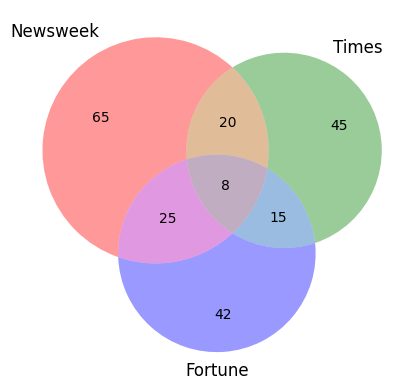

In [60]:
# Defining numbers
U = 120
N = 65
T = 45
F = 42
NT = 20
NF = 25
TF = 15
NFT = 8

# All readers
allReaders = N + F + T
# Intersections
overlap = NT + NF + TF

#Exclusive readers
onlyN = N - NT - NF + NFT
onlyF = F - NF - TF + NFT
onlyT = T - NT - TF + NFT

# People who read at least one magazine
atLeastOne = (allReaders - overlap) + NFT
# Exactly one magazine
onlyOne = onlyN + onlyF + onlyT

venn3(subsets = (N, T, NT, F, NF, TF, NFT), set_labels = ('Newsweek', 'Times', 'Fortune'))

print("Exclusive Readers (N,F,T):",onlyN,onlyF,onlyT)
print("Overlap:",overlap)
print("People who read at least one magazine:",atLeastOne)
print("People who read at only one magazine:",onlyOne)

$ |U| = 25 $\
$ |A| = 15 $\
$ |R| = 12 $\
$ |W| = 11 $\
$ |A \cup W| = 5 $\
$ |A \cup R| = 9 $\
$ |R \cup W| = 4 $\
$ |A \cup R \cup W| = 3 $

DEBUG 35 5 4 2 2 6 11 20 5
Exclusive Options (A,R,W): 4 2 5
Option combos excl. one (RW!A, AR!W, AW!R) 2 6 2
Cars with at least one option: 20
Cars with only one option: 11
Cars with no options: 5


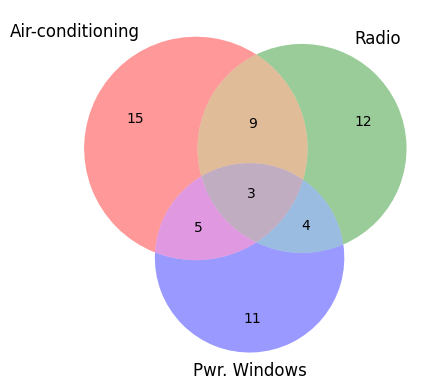

In [67]:
# Defining numbers
U = 25
A = 15
R = 12
W = 11
AW = 5
AR = 9
RW = 4
ARW = 3

# Overlap
all = (A + R+ W) - ARW
overlap = AW + AR + RW

# Cars with W only
onlyW = W - AW - RW + ARW
# Cars with A only
onlyA = A - AR - AW + ARW
# Cars with R only
onlyR = R - AR - RW + ARW
# Cars with R & W, not A
onlyAW = AW - ARW
# Cars with A & R, not W
onlyAR = AR - ARW
# Cars with A & W, not R
onlyAW = AW - ARW
# Cars with only 1 of the options
onlyOne = onlyW + onlyA + onlyR
# Cars with at least one option
atLeastOne = all - overlap + ARW
# Cars with no options
noOptions = U - atLeastOne

venn3(subsets = (A, R, AR, W, AW, RW, ARW), set_labels = ('Air-conditioning', 'Radio', 'Pwr. Windows'))

print("DEBUG",all,onlyW,onlyA,onlyR,onlyAW,onlyAR,onlyOne,atLeastOne,noOptions)
print("Exclusive Options (A,R,W):",onlyA,onlyR,onlyW)
print("Option combos excl. one (RW!A, AR!W, AW!R)",onlyAW,onlyAR,onlyAW)
print("Cars with at least one option:",atLeastOne)
print("Cars with only one option:",onlyOne)
print("Cars with no options:",noOptions)